# A Long time ago in a galaxy far, far away.... A disturbance in ML was felt.




### Data and inspiration drawn from: https://github.com/lemoinef/Star-Wars-Survey/

## Input and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn

In [2]:
input_df = pd.read_csv("https://raw.githubusercontent.com/lemoinef/Star-Wars-Survey/master/star_wars.csv")


In [3]:
star_wars = input_df.copy(deep=True)
# Remove NaN values from 'RespondentID' column.
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]


for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    'Are you familiar with the Expanded Universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?æ',
    'Do you consider yourself to be a fan of the Star Trek franchise?'
    ]:
    star_wars[col] = star_wars[col].map({"Yes": True, "No": False})


movie_mapping = {
"Star Wars: Episode I  The Phantom Menace": True,
np.nan: False,
"Star Wars: Episode II  Attack of the Clones": True,
"Star Wars: Episode III  Revenge of the Sith": True,
"Star Wars: Episode IV  A New Hope": True,
"Star Wars: Episode V The Empire Strikes Back": True,
"Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)


star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6",
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
        "Unnamed: 16": "Han Solo",
        "Unnamed: 17" : "Luke Skywalker",
        "Unnamed: 18" : "Princess Leia",
        "Unnamed: 19" : "Anakin Skywalker",
        "Unnamed: 20" : "Obi Wan Kenobi",
        "Unnamed: 21" : "Emperor Palpatine",
        "Unnamed: 22" : "Darth Vader",
        "Unnamed: 23" : "Lando Calrissian",
        "Unnamed: 24" : "Boba Fett",
        "Unnamed: 25" : "C-3PO",
        "Unnamed: 26" : "Jar Jar Binks",
        "Unnamed: 27" : "Queen Amidala",
        "Unnamed: 28" : "Yoda",
        "Do you consider yourself to be a fan of the Expanded Universe?æ" : "Do you consider yourself to be a fan of the Expanded Universe?"

        })

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Han Solo', 'Luke Skywalker', 'Princess Leia', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3PO', 'Jar Jar Binks',
       'Queen Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Regi

### Let's predict a binary outcome. Is Empire Strikes Back the best movie?

### We'll use:
1) Do you consider yourself to be a fan of the Expanded Universe?
2) Do you consider yourself to be a fan of the Star Trek franchise?
3) Gender 
4) Age
5) Household Income
6) Education
7) Location (Census Region)
8) Which character shot first?

### First let's make an analysis df and drop the NA's

In [61]:
star_wars_analysis = star_wars.copy(deep = True)[['Do you consider yourself to be a fan of the Expanded Universe?',\
                                                  'Do you consider yourself to be a fan of the Star Trek franchise?',\
                                                  'Gender',\
                                                  'Age',\
                                                  'Household Income',\
                                                  'Education',\
                                                  'Location (Census Region)',\
                                                  'Which character shot first?',\
                                                  'ranking_5']]

In [6]:
star_wars_analysis.isna().sum()
##Wow! let's drop that first column!
#Then we'll remove all rows that don't have a ranking. Be careful!! Why is this dangerous?

Do you consider yourself to be a fan of the Expanded Universe?      973
Do you consider yourself to be a fan of the Star Trek franchise?    118
Gender                                                              140
Age                                                                 140
Household Income                                                    328
Education                                                           150
Location (Census Region)                                            143
ranking_5                                                           350
dtype: int64

In [62]:
star_wars_analysis_clean = star_wars_analysis\
                            .drop(columns = ['Do you consider yourself to be a fan of the Expanded Universe?'])\
                            .dropna()


In [63]:
star_wars_analysis_clean["5IsBest"] = [1 if x == '1' else 0 for x in star_wars_analysis_clean['ranking_5']]
star_wars_analysis_clean


,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,ranking_5,5IsBest
3,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,5,0
4,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,4,0
5,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,1,1
6,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,5,0
9,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,1,1
...,...,...,...,...,...,...,...,...,...
1181,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,1,1
1182,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,2,0
1183,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,3,0
1185,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,2,0


In [64]:
star_wars_analysis_clean = star_wars_analysis_clean.drop(columns = ['ranking_5'])
star_wars_analysis_clean

,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,5IsBest
3,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,0
4,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,0
5,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,1
6,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,0
9,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,1
...,...,...,...,...,...,...,...,...
1181,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,1
1182,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,0
1183,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,0
1185,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,0


In [44]:
np.unique(star_wars_analysis_clean['Location (Census Region)'])

array(['East North Central', 'East South Central', 'Middle Atlantic',
       'Mountain', 'New England', 'Pacific', 'South Atlantic',
       'West North Central', 'West South Central'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
star_wars_analysis_clean['SexB'] = le.fit_transform(star_wars_analysis_clean['Gender'])

enc = OrdinalEncoder(categories=[['18-29', '30-44', '45-60', '> 60']])
star_wars_analysis_clean['AgeOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Age']))

enc = OrdinalEncoder(categories=[['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']])
star_wars_analysis_clean['IncomeOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Household Income']))

enc = OrdinalEncoder(categories=[['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree',\
                                   'Graduate degree']])
star_wars_analysis_clean['EduOrd'] = enc.fit_transform(pd.DataFrame(star_wars_analysis_clean['Education']))

star_wars_analysis_clean['LocationEnc'] = le.fit_transform(star_wars_analysis_clean['Location (Census Region)'])

star_wars_analysis_clean['ShotFirstEnc'] = le.fit_transform(star_wars_analysis_clean['Which character shot first?'])

In [66]:
star_wars_analysis_clean

,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Which character shot first?,5IsBest,SexB,AgeOrd,IncomeOrd,EduOrd,LocationEnc,ShotFirstEnc
3,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,I don't understand this question,0,1,0.0,0.0,1.0,7,2
4,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,I don't understand this question,0,1,0.0,3.0,2.0,7,2
5,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,Greedo,1,1,0.0,3.0,2.0,7,0
6,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,Han,0,1,0.0,1.0,3.0,2,1
9,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,Han,1,1,0.0,0.0,2.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific,Han,1,0,2.0,0.0,2.0,5,1
1182,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central,Han,0,0,0.0,0.0,2.0,0,1
1183,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain,I don't understand this question,0,0,1.0,2.0,3.0,3,2
1185,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central,Han,0,0,2.0,3.0,2.0,0,1


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(star_wars_analysis_clean[['SexB','AgeOrd','IncomeOrd','EduOrd','LocationEnc','ShotFirstEnc']],
                                                    star_wars_analysis_clean['5IsBest'],
                                                     test_size=0.2)

#### Random Forest Classifier

Accuracy: 0.5481481481481482


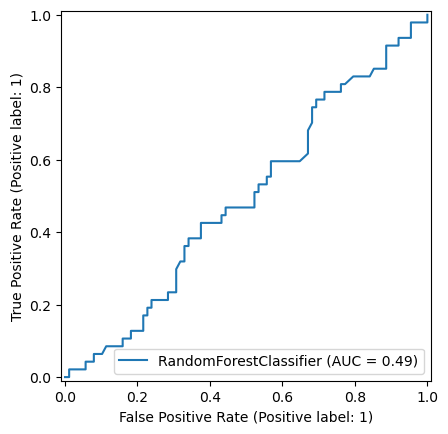

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


clf_rf = RandomForestClassifier(n_estimators = 100)  
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred_rf)))

svc_disp = RocCurveDisplay.from_estimator(clf_rf, X_test, y_test)
plt.show()
